In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from parameters import *
from functions import *

%matplotlib inline

In [2]:
def read_words(filename):
    with file(filename) as f:
        return [line.split(',')[0] for line in f]
    
word_freq_experiment_words = read_words('word_freq_experiment_words')
coocc_noise_experiment_words = read_words('coocc_noise_experiment_words')

In [6]:
vectors = load_word2vec_binary('vectors.bin')
vocab = list(vectors.index)
norms = np.sqrt((vectors ** 2).sum(axis=1))

# Compute the frequencies in the modified corpus

... as a sanity check and also to allow us to construct our plots, later.

In [47]:
new_counts = count_words('corpus-modified.txt')
total_words = sum(new_counts.values())
stats = pd.DataFrame({'occurrences': new_counts, 'L2_norm': norms}).dropna()
stats['occurrences_band'] = (2 ** np.floor(np.log2(stats.occurrences))).astype(int)
stats['log2_frequency'] = np.log2(stats.occurrences * 1. / total_words)

stats.occurrences_band.name = 'Occurrence band (by lower bound, base 2)' # necessary?
stats.L2_norm.name = 'L2 norm'

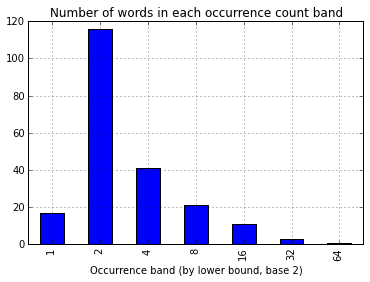

In [38]:
band_counts = stats.occurrences_band.dropna().value_counts().sort_index()
band_counts.index.name = stats.occurrences_band.name

_ = band_counts.plot(kind='bar', title='Number of words in each occurrence count band')

## The global relationship between L2 norm and frequency

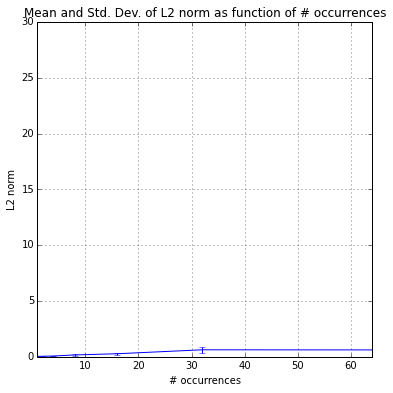

In [64]:
band_gb = stats.groupby('occurrences_band')

means = band_gb.L2_norm.mean()
errors = band_gb.L2_norm.std()
ax = means.plot(yerr=errors, title='Mean and Std. Dev. of L2 norm as function of # occurrences', figsize=(6, 6), ylim=(0, 30))
_ = ax.set_xlabel('# occurrences')
_ = ax.set_ylabel('L2 norm')
plt.savefig('frequency-norm-graph.png')

In [43]:
def set_num_plots(num_plots):
    colormap = plt.cm.gist_ncar
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

## Word Frequency Experiment

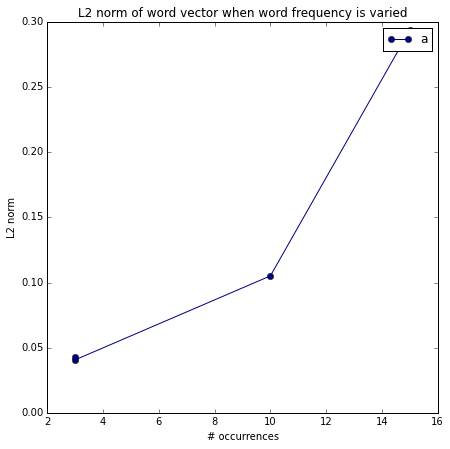

In [63]:
plt.figure(figsize=(7, 7))
plt.title('L2 norm of word vector when word frequency is varied')
plt.xlabel('# occurrences')
plt.ylabel(stats.L2_norm.name)

set_num_plots(len(word_freq_experiment_words))

def plot_for_word(word, **kwargs):
    idxs = [build_experiment_token(word, i) for i in range(1, max(word_freq_experiment_ratio, word_freq_experiment_power_max) + 1)]
    x = stats.loc[idxs].occurrences
    y = stats.loc[idxs].L2_norm
    plt.plot(x, y, marker='o', **kwargs)

for word in word_freq_experiment_words:
    plot_for_word(word)

_ = plt.legend(word_freq_experiment_words, loc='upper right')
plt.savefig('word-frequency-experiment-graph.png')

## Co-occurrence noise experiment

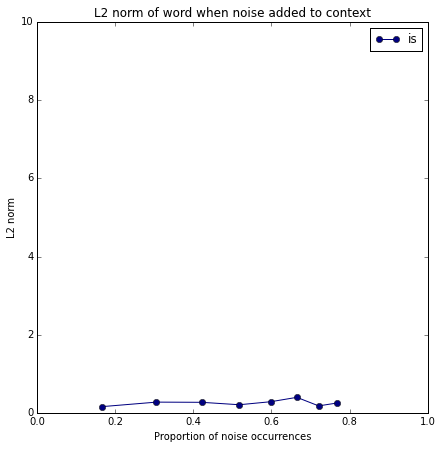

In [62]:
plt.figure(figsize=(7, 7))
plt.title('L2 norm of word when noise added to context')
plt.xlabel('Proportion of noise occurrences')
plt.ylabel(stats.L2_norm.name)
plt.ylim(0, 10)
plt.xlim(0, 1)

set_num_plots(len(coocc_noise_experiment_words))

def plot_for_word(word, **kwargs):
    exponents = filter(lambda i: build_experiment_token(word, i) in stats.index, range(1, coocc_noise_experiment_power_max + 1))
    idxs = [build_experiment_token(word, i) for i in exponents]
    x = [1 - coocc_noise_experiment_ratio ** exponent for exponent in exponents]
    y = stats.loc[idxs].L2_norm
    plt.plot(x, y, marker='o', **kwargs)

for word in coocc_noise_experiment_words:
    plot_for_word(word)

_ = plt.legend(coocc_noise_experiment_words, loc='upper right')
plt.savefig('cooccurrence-noise-graph.png')

In [59]:
plt.savefig?